# <span class="bg-primary">21. ANALYSER DONNEES TEXTUELLES</span>

In [ ]:
# <span class="bg-info"> </span>

In [6]:
import nltk
# nltk.download()

In [10]:
from nltk.corpus import gutenberg

In [20]:
gutenberg

<PlaintextCorpusReader in 'C:\\Users\\PC Maison\\AppData\\Roaming\\nltk_data\\corpora\\gutenberg'>

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

def freq_stats_corpora():
    corpora = defaultdict(list)

    # Création d'un corpus de tokens par artiste
    for artiste,sentence_id in artistes.iteritems():
        for sentence_id in sentence_id:
            corpora[artiste] += tokenizer.tokenize(
                                    db[sentence_id]['text'].decode('utf-8').lower()
                                )

    stats, freq = dict(), dict()

    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v)} 
        
    return (freq, stats, corpora)

# Récupération des comptages
freq, stats, corpora = freq_stats_corpora()
df = pd.DataFrame.from_dict(stats, orient='index')

# Affichage des fréquences
df.sort(columns='total', ascending=False)
df.plot(kind='bar', color="#f56900", title='Top 50 Rappeurs par nombre de mots')

# exemple du cours vers de rap et rappeurs

In [15]:
db = load_all_sentences();
print('chargement de {} vers dans la db'.format(len(db.keys())))

In [ ]:
from collections import defaultdict
base_artistes = defaultdict(set)
for k,v in db.iteritems():
    base_artistes[v['artistes']].add(k)
artistes = { k:v for k,v in artistes.iteritems() if len(v) > 200 }
print('{} artistes'.format(len(artistes)))

# <span class="bg-warning">Exploration du test</span>

In [16]:
import nltk
test = "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"

nltk.word_tokenize(test)

['Bonjour',
 ',',
 'je',
 'suis',
 'un',
 'texte',
 "d'exemple",
 'pour',
 'le',
 'cours',
 "d'Openclassrooms",
 '.',
 'Soyez',
 'attentifs',
 'à',
 'ce',
 'cours',
 '!']

# <span class="bg-warning">NORMALISATION DES TOKENS</span>

In [18]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize("Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !")

['Bonjour',
 'je',
 'suis',
 'un',
 'texte',
 'd',
 'exemple',
 'pour',
 'le',
 'cours',
 'd',
 'Openclassrooms',
 'Soyez',
 'attentifs',
 'à',
 'ce',
 'cours']

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

def freq_stats_corpora():
    corpora = defaultdict(list)

    # Création d'un corpus de tokens par artiste
    for artiste,sentence_id in artistes.iteritems():
        for sentence_id in sentence_id:
            corpora[artiste] += tokenizer.tokenize(
                                    db[sentence_id]['text'].decode('utf-8').lower()
                                )

    stats, freq = dict(), dict()

    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v)} 
        
    return (freq, stats, corpora)

# Récupération des comptages
freq, stats, corpora = freq_stats_corpora()
df = pd.DataFrame.from_dict(stats, orient='index')

# Affichage des fréquences
df.sort(columns='total', ascending=False)
df.plot(kind='bar', color="#f56900", title='Top 50 Rappeurs par nombre de mots')

In [ ]:
rcParams['figuure.figsize'] = 15, 5
colors = ['#f56900', '#fce0cc']
t = 'Top 50 Rappeurs par mot unique employee'
df[:50].plot(kind='bar', color=colors, title=t, stacked=True)

In [21]:
# comptage ds mots uniques
def freq_stats_corpora():
    corpora = defaultdict(list)
    for artiste,sentence_ids in artistes.iteritems():
        for sentence_id in sentence_ids:
            corpora[artiste] += tokenizer.tokenize(
                                    db[sentence_id]['text'].decode('utf-8').lower()
                                )
        
    stats, freq = dict(), dict()

    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}

    return (freq, stats, corpora)


In [ ]:
rcParams['figuure.figsize'] = 15, 5
colors = ['#f56900', '#fce0cc']
t = 'Top 50 Rappeurs par mot unique employee'
df[:50].plot(kind='bar', color=colors, title=t, stacked=True)

# <span class="bg-warning">NETTOYAGE - SUPPRESSION STOPWORDS</span>

In [ ]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le 
# corpus d'artistes
freq_totale = nltk.Counter()
for k, v in corpora.iteritems():
    freq_totale += freq[k]

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les
# plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du 
# nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
most_freq = zip(*freq2.most_common(100))[0]

stop_words = zip(*freq_total.most_common(100))[0]

# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus
# fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent 
# dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('french')))




# <span class="bg-warning">TOKENIZATION SANS STOPWORDS</span>

In [ ]:
def freq_stats_corpora2(lookup_table=[]):
    corpora = defaultdict(list)
    for artist, block_ids in lt_artists.iteritems():
        for block_id in block_ids:
            tokens = tokenizer.tokenize(db_flat[block_id]['text'].decode('utf-8'))
            corpora[artist] += [w for w in tokens if not w in list(sw)]

    stats, freq = dict(), dict()

    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
    return (freq, stats, corpora)

freq2, stats2, corpora2 = freq_stats_corpora2()


In [ ]:
rcParams['figuure.figsize'] = 15, 5
colors = ['#f56900', '#fce0cc']
t = 'Top 50 Rappeurs par mot unique employee'
df[:50].plot(kind='bar', color=colors, title=t, stacked=True)

# <span class="bg-warning">NETTOYAGE - STEMMING</span>

In [ ]:
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()

def freq_stats_corpora3(lookup_table=[]):
    corpora = defaultdict(list)
    for artist, block_ids in lt_artists.iteritems():
        for block_id in block_ids:
            tokens = tokenizer.tokenize(db_flat[block_id]['text'].decode('utf-8').lower())
            corpora[artist] += [stemmer.stem(w) for w in tokens if not w in list(sw)]

    stats, freq = dict(), dict()

    for k, v in corpora.iteritems():
        freq[k] = fq = nltk.FreqDist(v)
        stats[k] = {'total': len(v), 'unique': len(fq.keys())}
    return (freq, stats, corpora)

freq3, stats3, corpora3 = freq_stats_corpora3()
df3 = pd.DataFrame.from_dict(stats3, orient='index').sort(columns='unique', ascending=False)


In [ ]:
rcParams['figuure.figsize'] = 15, 5
colors = ['#f56900', '#fce0cc']
t = 'Top 50 Rappeurs par mot unique employee'
df[:50].plot(kind='bar', color=colors, title=t, stacked=True)

# <span class="bg-warning">QUIZ</span>

In [28]:
test = "La seconde partie de du cours de traitement de texte traite de la transformation des données textuelles"
tokens = tokenizer.tokenize(test.lower())
nb_trigram = list(nltk.trigrams(tokens))
print('Nbre trigram :',len(nb_trigram))
nb_trigram

Nbre trigram : 15


[('la', 'seconde', 'partie'),
 ('seconde', 'partie', 'de'),
 ('partie', 'de', 'du'),
 ('de', 'du', 'cours'),
 ('du', 'cours', 'de'),
 ('cours', 'de', 'traitement'),
 ('de', 'traitement', 'de'),
 ('traitement', 'de', 'texte'),
 ('de', 'texte', 'traite'),
 ('texte', 'traite', 'de'),
 ('traite', 'de', 'la'),
 ('de', 'la', 'transformation'),
 ('la', 'transformation', 'des'),
 ('transformation', 'des', 'données'),
 ('des', 'données', 'textuelles')]

# <span class="bg-info">TP - LDA</span>

In [29]:
# Chargement des données
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [31]:
# transformer les documents avec des comptages pour récupérer les
# termes frequency d'apparition de chaque mot dans une matrice
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(documents)

In [34]:
# création d'un modèle LDA
from sklearn.decomposition import LatentDirichletAllocation

# nombre de sujets contenus dans le corpus de documents
n_topics = 20
# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)

In [39]:
# Evaluation
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tf_feature_names = tf_vectorizer.get_feature_names()
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
people gun state control right guns crime states law police
Topic 1:
time question book years did like don space answer just
Topic 2:
mr line rules science stephanopoulos title current define int yes
Topic 3:
key chip keys clipper encryption number des algorithm use bit
Topic 4:
edu com cs vs w7 cx mail uk 17 send
Topic 5:
use does window problem way used point different case value
Topic 6:
windows thanks know help db does dos problem like using
Topic 7:
bike water effect road design media dod paper like turn
Topic 8:
don just like think know people good ve going say
Topic 9:
car new price good power used air sale offer ground
Topic 10:
file available program edu ftp information files use image version
Topic 11:
ax max b8f g9v a86 145 pl 1d9 0t 34u
Topic 12:
government law privacy security legal encryption court fbi technology information
Topic 13:
card bit memory output video color data mode monitor 16
Topic 14:
drive scsi disk mac hard apple drives controller software port
T

# <span class="bg-info">CLASSIFICATION NAIVE DE SENTIMENTS</span>

In [5]:
import nltk
import os
from tools import ap

def format_sentence(sent):
    return ({ word: True for word in nltk.word_tokenize(sent.decode('utf-8')) })

def load_training_set():
    training = []

    for fp in os.listdir('aclImdb/train/pos'):
        example = '{}/{}'.format('aclImdb/train/pos', fp)
        with open(example) as fp:
            for i in fp:
                training.append([format_sentence(i), 'pos'])
          pass   
    for fp in os.listdir(ap('aclImdb/train/neg')):
        example = '{}/{}'.format(ap('aclImdb/train/neg'), fp)
        with open(example) as fp:
            for i in fp:
                training.append([format_sentence(i), 'neg'])

    return training

training = load_training_set()

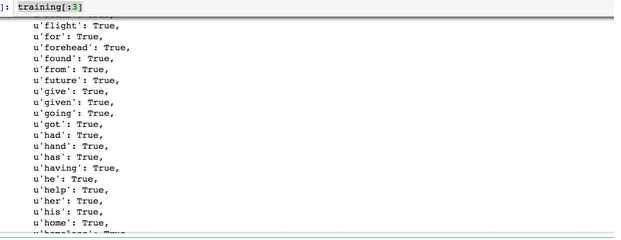

In [ ]:
# import io
# import pandas as pd
# import numpy as np

# with io.open('data/aclImdb/train-pos.txt', encoding='utf-8')
# train_pos = pd.DataFrame({'review': list(f)})
# with io.open('data/aclImdb/train-neg.txt', encoding='utf-8')
# train_neg = pd.DataFrame({'review': list(f)})
# train_reviews = pd.concat([train_neg, train_pos], ignore_index
# with io.open('data/aclImdb/test-pos.txt', encoding='utf-8') as
# test_pos = pd.DataFrame({'review': list(f)})
# with io.open('data/aclImdb/test-neg.txt', encoding='utf-8') as
# test_neg = pd.DataFrame({'review': list(f)})
# test_reviews = pd.concat([test_neg, test_pos], ignore_index=True
# X_train = train_reviews['review']
# X_test = test_reviews['review']
# y_train = np.append(np.zeros(12500), np.ones(12500))
# y_test

In [ ]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train)

In [ ]:
classifier.show_most_informative_features(n=25)

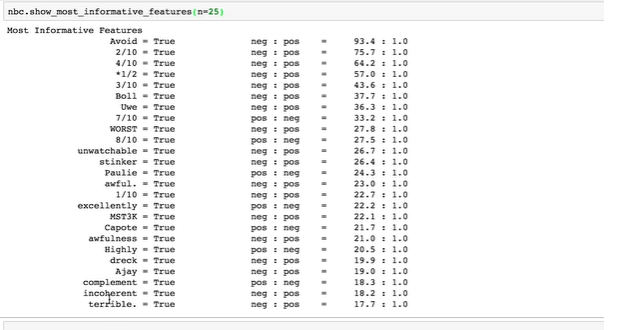

In [ ]:
print(accuracy(classifier, test))

In [ ]:
# <span class="bg-info"> </span>